In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!apt-get install -y fonts-montserrat


df = pd.read_csv("HRDataset.csv")
df.head()

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package fonts-montserrat


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"King, Janet",10089,1,1,0,1,2,3,0,250000,...,Board of Directors,9.0,Indeed,Fully Meets,4.83,3,0,1/17/2019,0,10
1,"Zamora, Jennifer",10010,0,0,0,1,3,4,0,220450,...,Janet King,2.0,Employee Referral,Exceeds,4.60,5,6,2/21/2019,0,16
2,"Houlihan, Debra",10272,1,1,0,1,6,3,0,180000,...,Janet King,2.0,LinkedIn,Fully Meets,4.50,4,0,1/21/2019,0,19
3,"Foss, Jason",10015,0,0,1,1,3,4,0,178000,...,Jennifer Zamora,5.0,Indeed,Exceeds,5.00,5,5,1/7/2019,0,15
4,"Corleone, Vito",10019,0,0,1,1,5,4,0,170500,...,Janet King,2.0,Indeed,Exceeds,3.70,5,0,2/4/2019,0,15


Departements Analysis

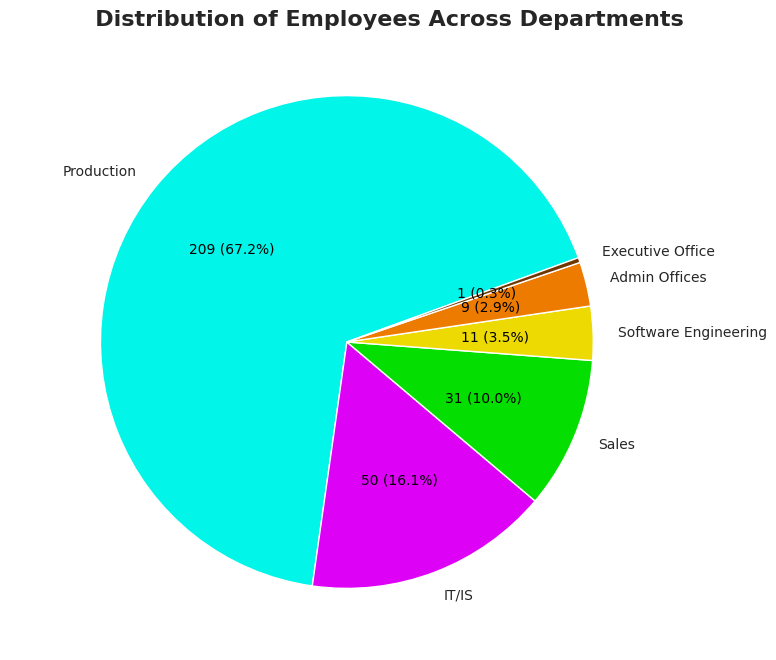

In [61]:
# Clean department names by dropping null values if they exist and stripping leading & trailing whitespaces.
df_cleaned = df.dropna(subset=['Department'])
df_cleaned['Department'] = df_cleaned['Department'].str.strip()

# Get the count of employees by department
department_counts = df_cleaned['Department'].value_counts()

# Create a custom color palette for each departement
custom_palette = {'Production': '#02f5e9',
                  'IT/IS': '#dd02f5',
                  'Software Engineering': '#edda02',
                  'Admin Offices': '#ed7b00',
                  'Sales':'#04de00',
                  'Executive Office':'#6e3701'
                  }
# Set font parameters for the text in the graph.
font_params = {'fontsize': 16, 'fontweight': 'bold', 'fontname': 'Montserrat'}

plt.figure(figsize=(8, 8))
patches, texts, autotexts = plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=20, colors=[custom_palette[dept] for dept in department_counts.index])
plt.title('           Distribution of Employees Across Departments', fontname='Montserrat', fontsize=16, fontweight='bold')

# Add employee count and percentage to the pie chart.
for text, autotext, count in zip(texts, autotexts, department_counts):
    text.set(fontsize=10, fontname='Montserrat')
    autotext.set(fontsize=10, fontname='Montserrat', color='black')
    autotext.set_text(f'{count} ({autotext.get_text()})')

plt.show()


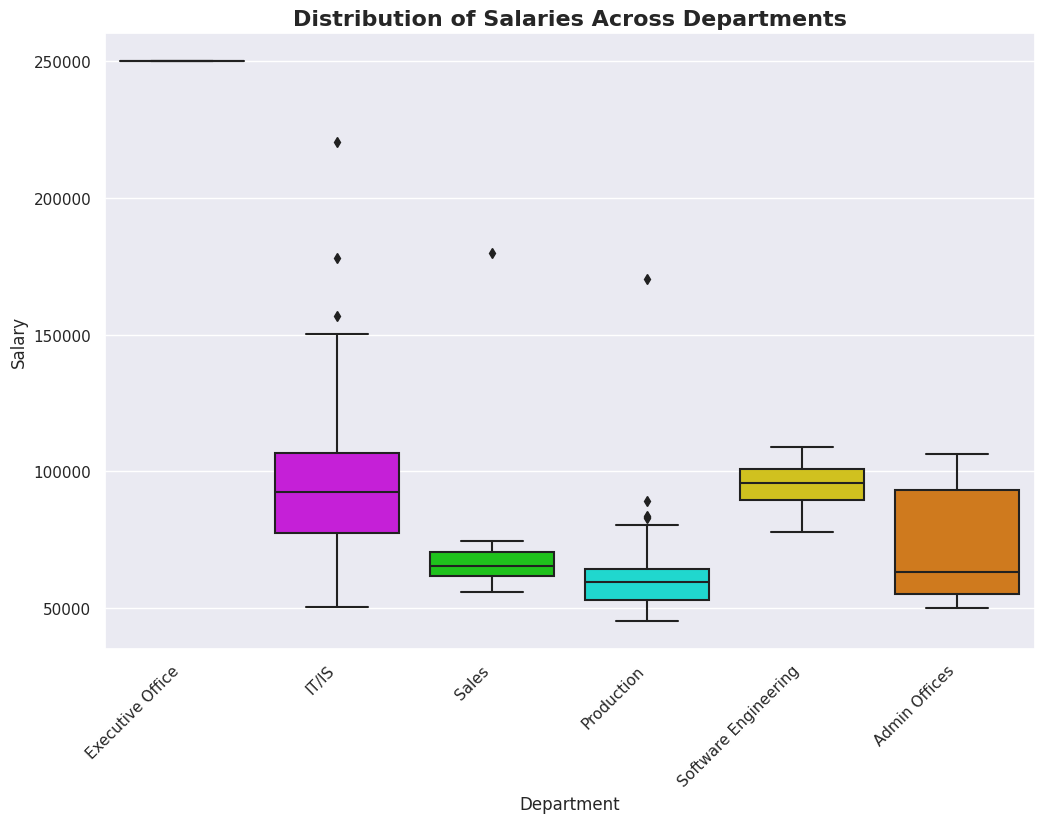

In [44]:
# Create a box plot
plt.rcParams['font.family'] = 'Montserrat'
plt.figure(figsize=(12, 8))
sns.boxplot(x='Department', y='Salary', data=df_cleaned, palette=custom_palette)
plt.title('Distribution of Salaries Across Departments', fontname='Montserrat', fontsize=16, fontweight= 'bold')
plt.xlabel('Department', fontname='Montserrat', fontsize=12)
plt.ylabel('Salary', fontname='Montserrat', fontsize=12)
# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')
plt.show()

<ipython-input-45-80c1a940657d>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_cleaned, x='Department', y='EmpSatisfaction', palette=custom_palette, ci=None, edgecolor='black')


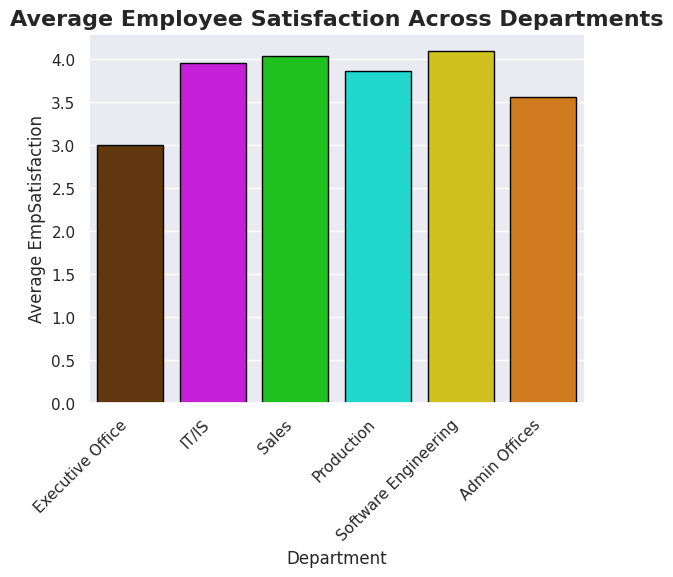

In [45]:
sns.barplot(data=df_cleaned, x='Department', y='EmpSatisfaction', palette=custom_palette, ci=None, edgecolor='black')
plt.title('Average Employee Satisfaction Across Departments', fontname='Montserrat', fontsize=16, fontweight= 'bold')
plt.xlabel('Department', fontname='Montserrat', fontsize=12)
plt.ylabel('Average EmpSatisfaction', fontname='Montserrat', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.show()

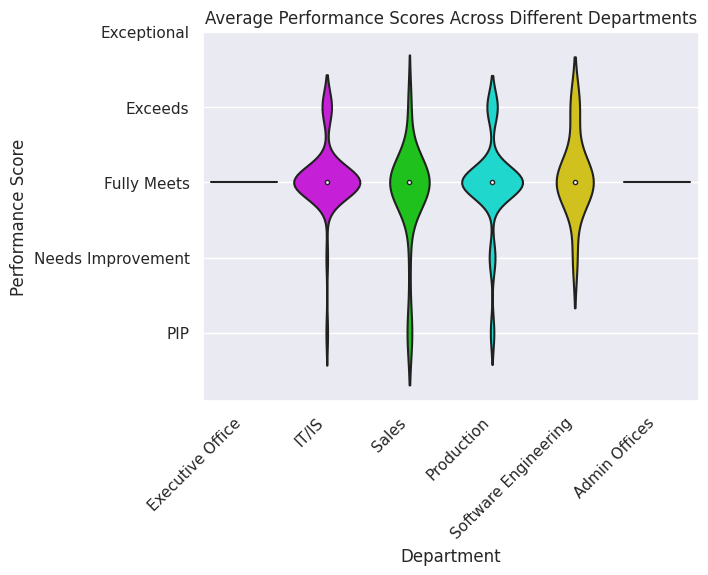

In [46]:
sns.violinplot(data=df_cleaned, x='Department', y='PerfScoreID', palette=custom_palette)
plt.title('Average Performance Scores Across Different Departments')
plt.xlabel('Department')
plt.ylabel('Performance Score')
plt.yticks([1, 2, 3, 4, 5], ['PIP', 'Needs Improvement', 'Fully Meets', 'Exceeds', 'Exceptional'])
plt.xticks(rotation=45, ha='right')
plt.show()

In [47]:
average_satisfaction_by_department = df.groupby('Department')['EmpSatisfaction'].mean()
# Print the result
print("Average Employee Satisfaction by Department:")
print(average_satisfaction_by_department)

Average Employee Satisfaction by Department:
Department
Admin Offices           3.555556
Executive Office        3.000000
IT/IS                   3.960000
Production              3.861244
Sales                   4.032258
Software Engineering    4.090909
Name: EmpSatisfaction, dtype: float64


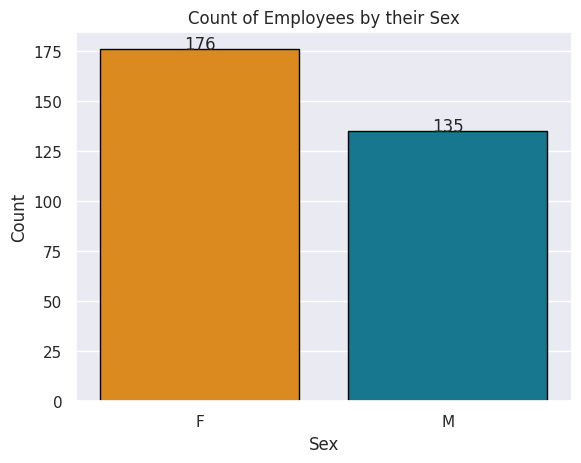

In [63]:
df_cleaned['Sex'] = df_cleaned['Sex'].str.strip()

fm_palette = {'M': '#0283a3',
              'F': '#fa8e00'}

ax = sns.countplot(data=df_cleaned, x='Sex', palette=fm_palette, order=df_cleaned['Sex'].value_counts().index, edgecolor='black')

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='baseline')

plt.title('Count of Employees by their Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

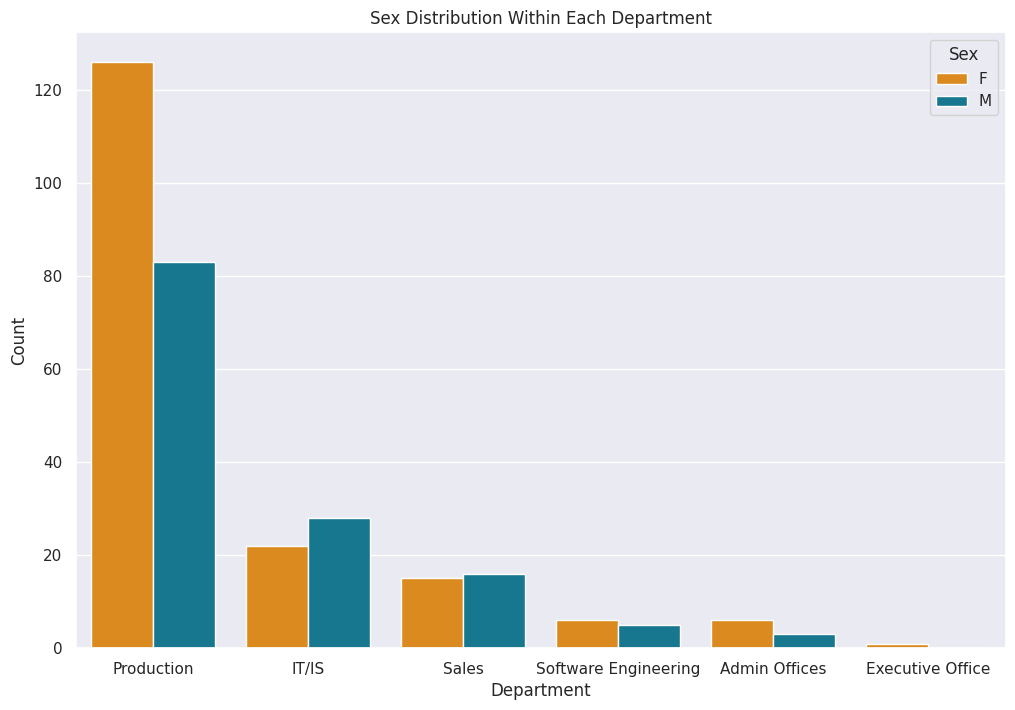

In [64]:
plt.figure(figsize=(12, 8))
sns.countplot(data=df_cleaned, x='Department', hue='Sex', palette=fm_palette, order=df_cleaned['Department'].value_counts().index, dodge=True)
plt.title('Sex Distribution Within Each Department')
plt.xlabel('Department')
plt.ylabel('Count')
plt.legend(title='Sex', loc='upper right')
plt.show()

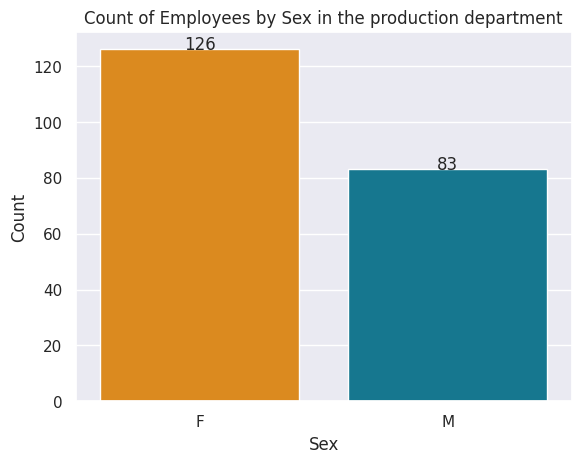

In [65]:
df_production = df_cleaned[df_cleaned['Department'] == 'Production']
ax = sns.countplot(data=df_production, x='Sex', palette=fm_palette, order=df_cleaned['Sex'].value_counts().index, )

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='baseline')

plt.title('Count of Employees by Sex in the production department')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

In [68]:
# Calculate the percentage of males and females who work in the production departement
total_count = len(df_production)

male_percentage = 83*100/135
female_percentage = 126*100/176

print(f'{male_percentage:.2f}% of males work in the production depatement.')
print(f'{female_percentage:.2f}% females work in the production depatement.')

61.48% of males work in the production depatement.
71.59% females work in the production depatement.


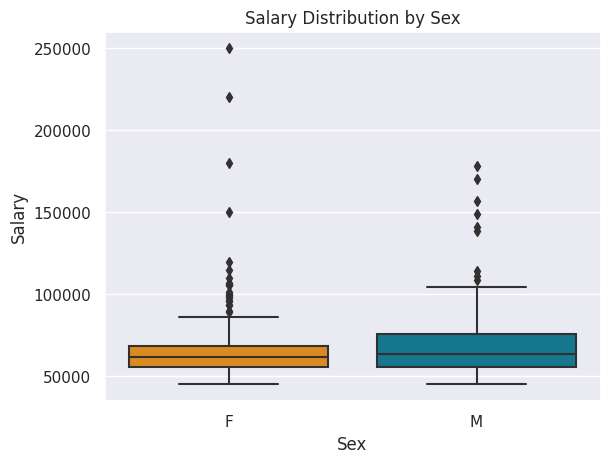

In [67]:
# Box plot for salary distribution by sex
sns.boxplot(x='Sex', y='Salary', data=df_cleaned, palette = fm_palette)
plt.title('Salary Distribution by Sex')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

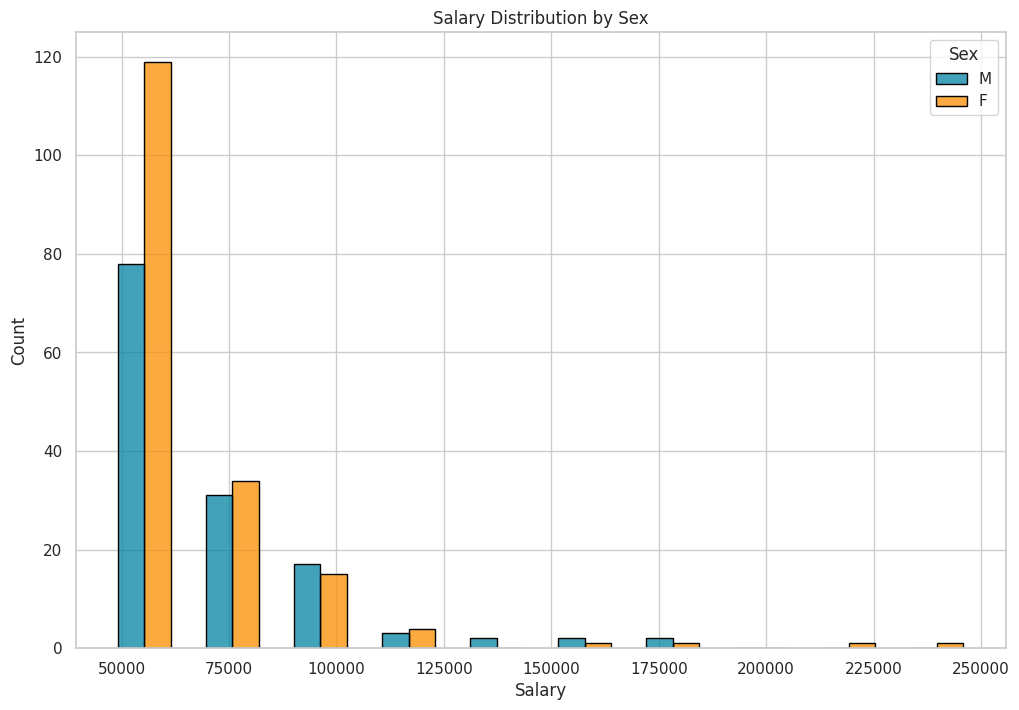

In [ ]:
# Histograms for salary distribution by sex
plt.figure(figsize=(12, 8))
sns.histplot(data=df_cleaned, x='Salary', hue='Sex', multiple='dodge', bins=10, palette = fm_palette, shrink=0.6, edgecolor='black')
plt.title('Salary Distribution by Sex')
plt.xlabel('Salary')
plt.ylabel('Count')
plt.show()

In [69]:
average_satisfaction_by_sex = df.groupby('Sex')['EmpSatisfaction'].mean()

# Print the result
print("Average EmpSatisfaction by Sex:")
print(average_satisfaction_by_sex)


Average EmpSatisfaction by Sex:
Sex
F     3.926136
M     3.844444
Name: EmpSatisfaction, dtype: float64


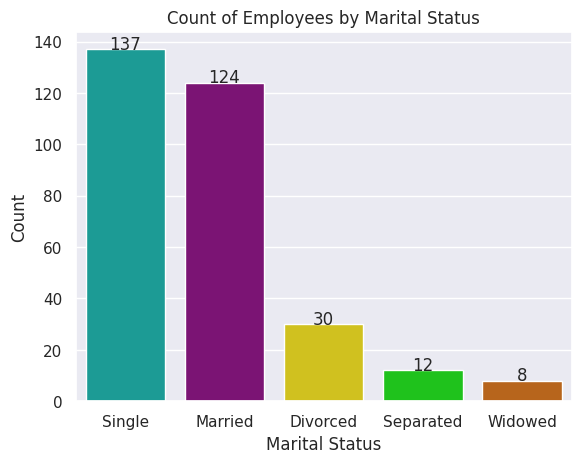

In [70]:
df_cleaned['MaritalDesc'] = df_cleaned['MaritalDesc'].str.strip()

# Define a custom color palette for each maritial status
custom_palette = {'Single': '#07b0a8',
                  'Married': '#8c0383',
                  'Divorced': '#edda02',
                  'Widowed': '#d16302',
                  'Separated':'#04de00'
                  }
# Create a countplot for Marital Status
ax = sns.countplot(data=df_cleaned, x='MaritalDesc', palette=custom_palette, order=df_cleaned['MaritalDesc'].value_counts().index)

for p in ax.patches:
    # Convert the height to integer for annotation
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='baseline')

plt.title('Count of Employees by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

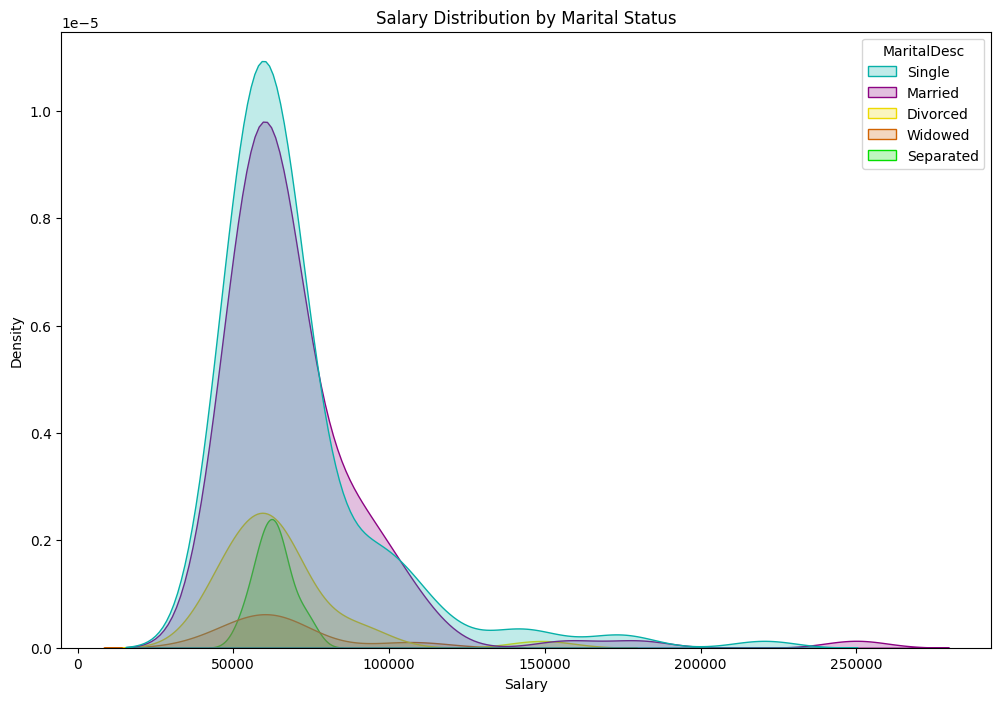

In [ ]:
# KDE plots for salary distribution by marital status
plt.figure(figsize=(12, 8))
sns.kdeplot(data=df_cleaned, x='Salary', hue='MaritalDesc', fill=True, palette=custom_palette)
plt.title('Salary Distribution by Marital Status')
plt.xlabel('Salary')
plt.ylabel('Density')
plt.show()


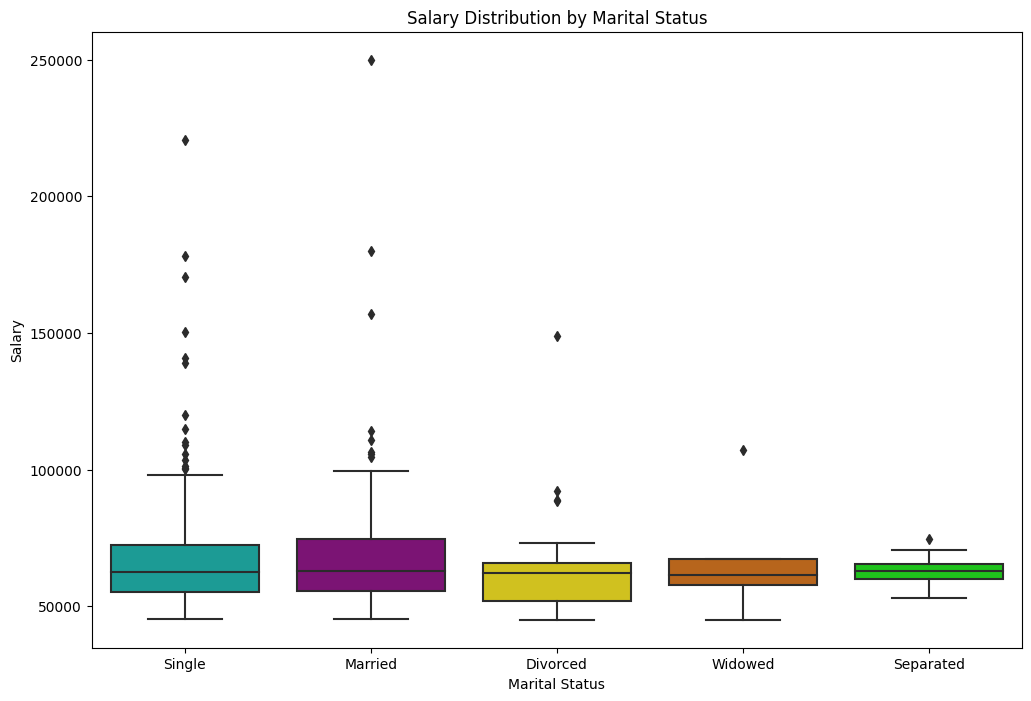

In [ ]:
# Box plot for salary distribution by marital status
plt.figure(figsize=(12, 8))
sns.boxplot(x='MaritalDesc', y='Salary', data=df_cleaned, palette=custom_palette)
plt.title('Salary Distribution by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Salary')
plt.show()

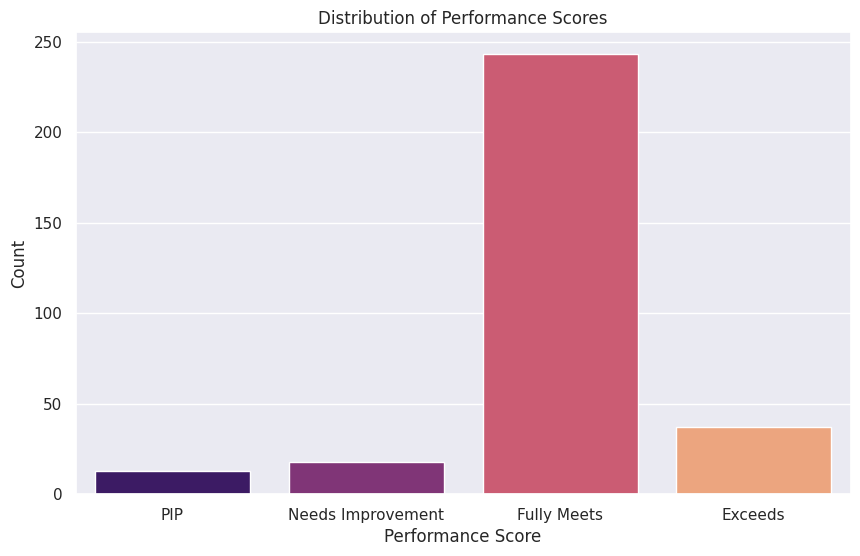

In [11]:
df_cleaned = df.dropna(subset=['Salary'])

performance_order = ['PIP', 'Needs Improvement', 'Fully Meets', 'Exceeds']

# Countplot for the distribution of performance scores
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='PerformanceScore', palette="magma", order=performance_order)
plt.title('Distribution of Performance Scores')
plt.xlabel('Performance Score')
plt.ylabel('Count')
plt.show()

<ipython-input-166-297fe2b288dd>:13: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.pointplot(data=df_cleaned, x='Department', y='PerfScoreID', ci=None, estimator='mean', palette='magma')


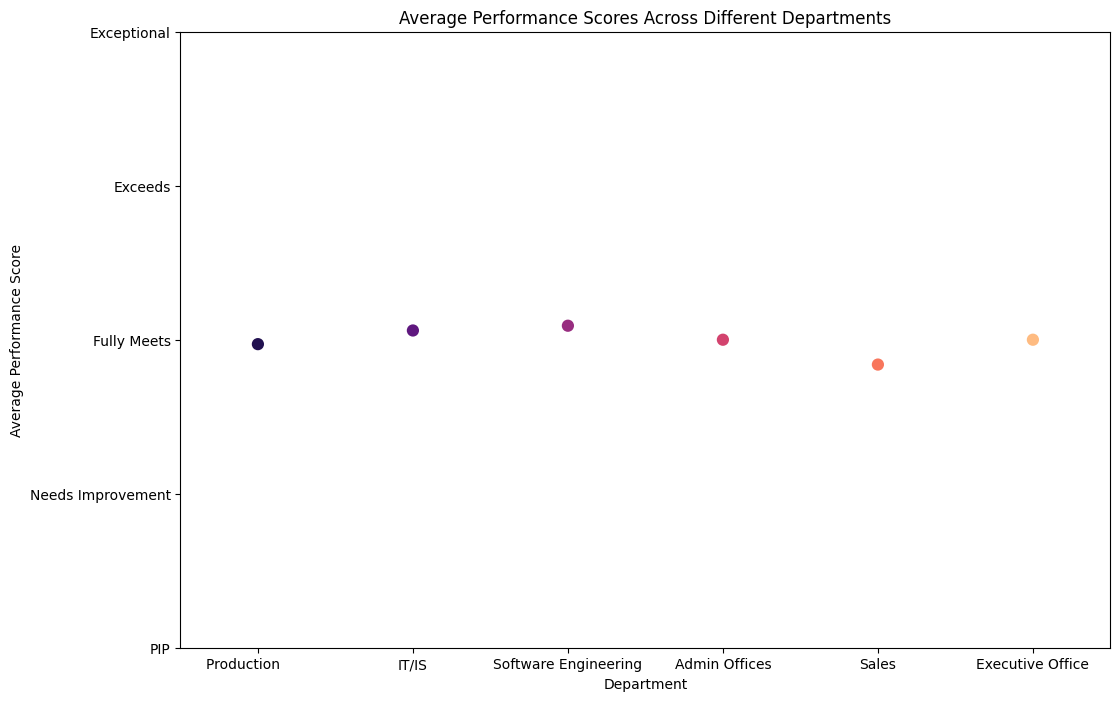

In [ ]:
score_mapping = {
    1: 'PIP',
    2: 'Needs Improvement',
    3: 'Fully Meets',
    4: 'Exceeds',
    5: 'Exceptional'
}

df_cleaned['MappedScore'] = df_cleaned['PerfScoreID'].map(score_mapping)

# Point plot for the average performance scores across different departments
plt.figure(figsize=(12, 8))
sns.pointplot(data=df_cleaned, x='Department', y='PerfScoreID', ci=None, estimator='mean', palette='Set2')
plt.title('Average Performance Scores Across Different Departments')
plt.xlabel('Department')
plt.ylabel('Average Performance Score')
plt.yticks([1, 2, 3, 4, 5], ['PIP', 'Needs Improvement', 'Fully Meets', 'Exceeds', 'Exceptional'])
plt.show()

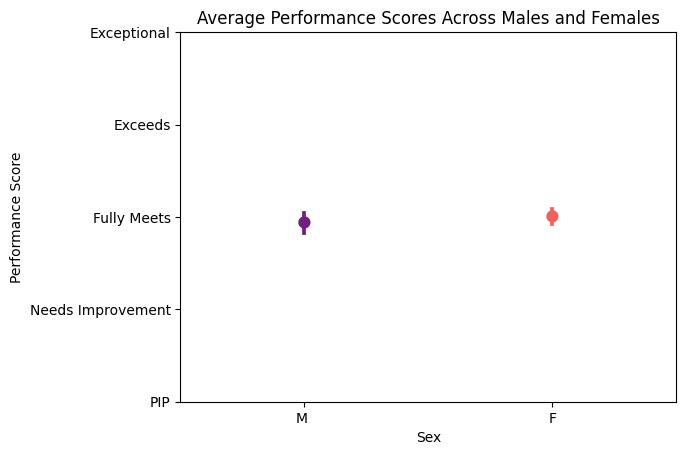

In [ ]:
sns.pointplot(data=df_cleaned, x='Sex', y='PerfScoreID', palette='magma')
plt.title('Average Performance Scores Across Males and Females')
plt.xlabel('Sex')
plt.ylabel('Performance Score')
plt.yticks([1, 2, 3, 4, 5], ['PIP', 'Needs Improvement', 'Fully Meets', 'Exceeds', 'Exceptional'])
plt.show()

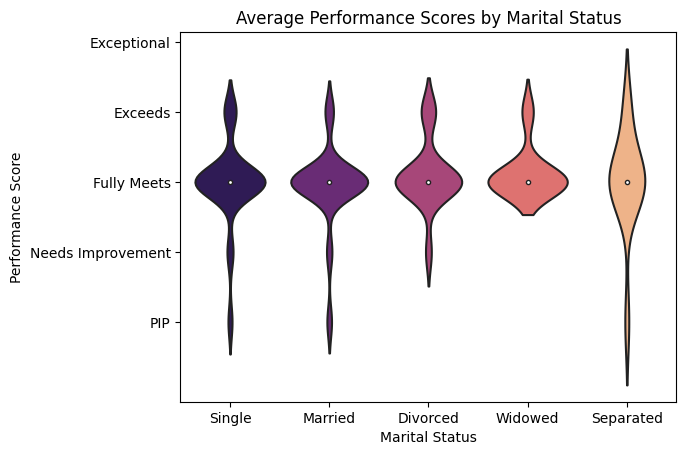

In [ ]:
sns.violinplot(data=df_cleaned, x='MaritalDesc', y='PerfScoreID', palette='magma')
plt.title('Average Performance Scores by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Performance Score')
plt.yticks([1, 2, 3, 4, 5], ['PIP', 'Needs Improvement', 'Fully Meets', 'Exceeds', 'Exceptional'])
plt.show()

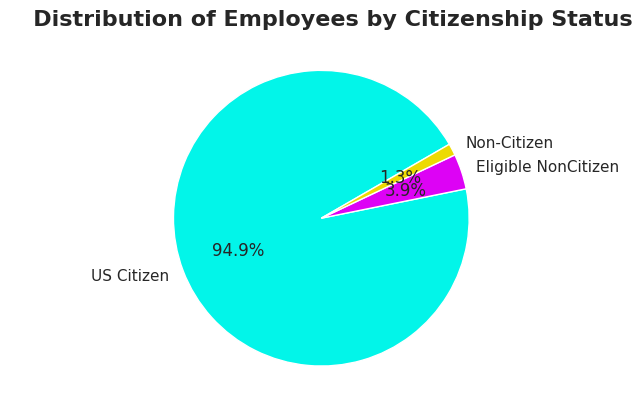

In [ ]:
# Dropping rows with missing citizenship status in case there is any.
df_cleaned = df.dropna(subset=['CitizenDesc'])

# Count the number of employees for each citizenship status.
citizenship_counts = df_cleaned['CitizenDesc'].value_counts()

plt.pie(citizenship_counts, labels=citizenship_counts.index, autopct='%1.1f%%', startangle=30, colors=['#02f5e9', '#dd02f5', '#edda02'])
plt.title('   Distribution of Employees by Citizenship Status', fontname='Montserrat', fontsize=16, fontweight= 'bold')

plt.show()

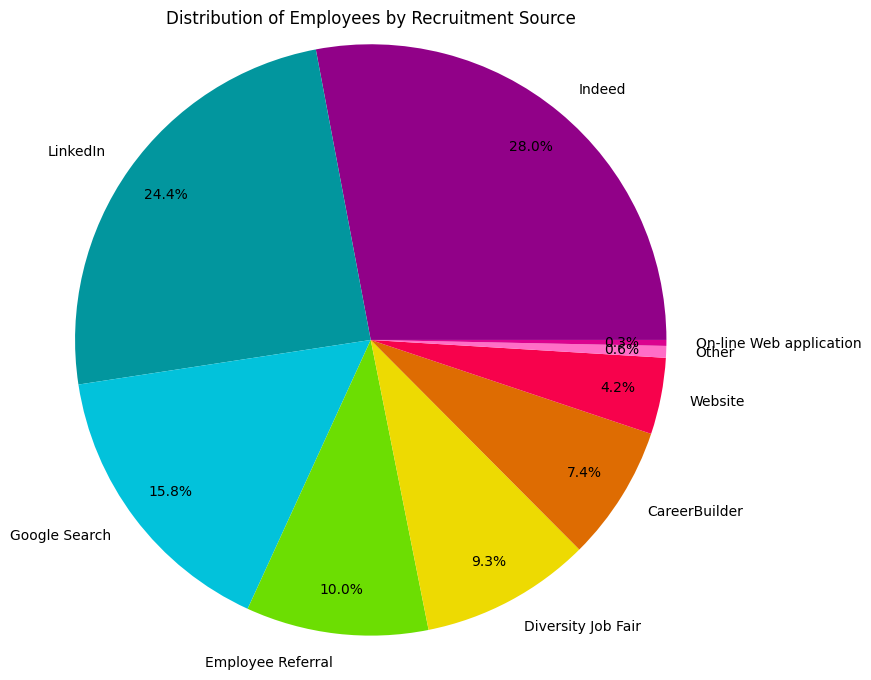

In [ ]:
df_cleaned = df.dropna(subset=['RecruitmentSource'])

colors = ['#910188', '#02969e', '#02c2db', '#6cde02','#edda02', '#de6c02', '#f7024c','#FF6EC7', '#db028f']

# Count the number of employees for each recruitment source
source_counts = df_cleaned['RecruitmentSource'].value_counts()

# Create a pie chart using Matplotlib
plt.figure(figsize=(10, 8))
plt.pie(source_counts, labels=source_counts.index, autopct='%1.1f%%', startangle=0, radius=1.2, pctdistance=0.85, colors= colors)
plt.title('Distribution of Employees by Recruitment Source')



# Customize with Seaborn style if needed
sns.set(style="whitegrid")
sns.despine(left=True, bottom=True)

plt.show()

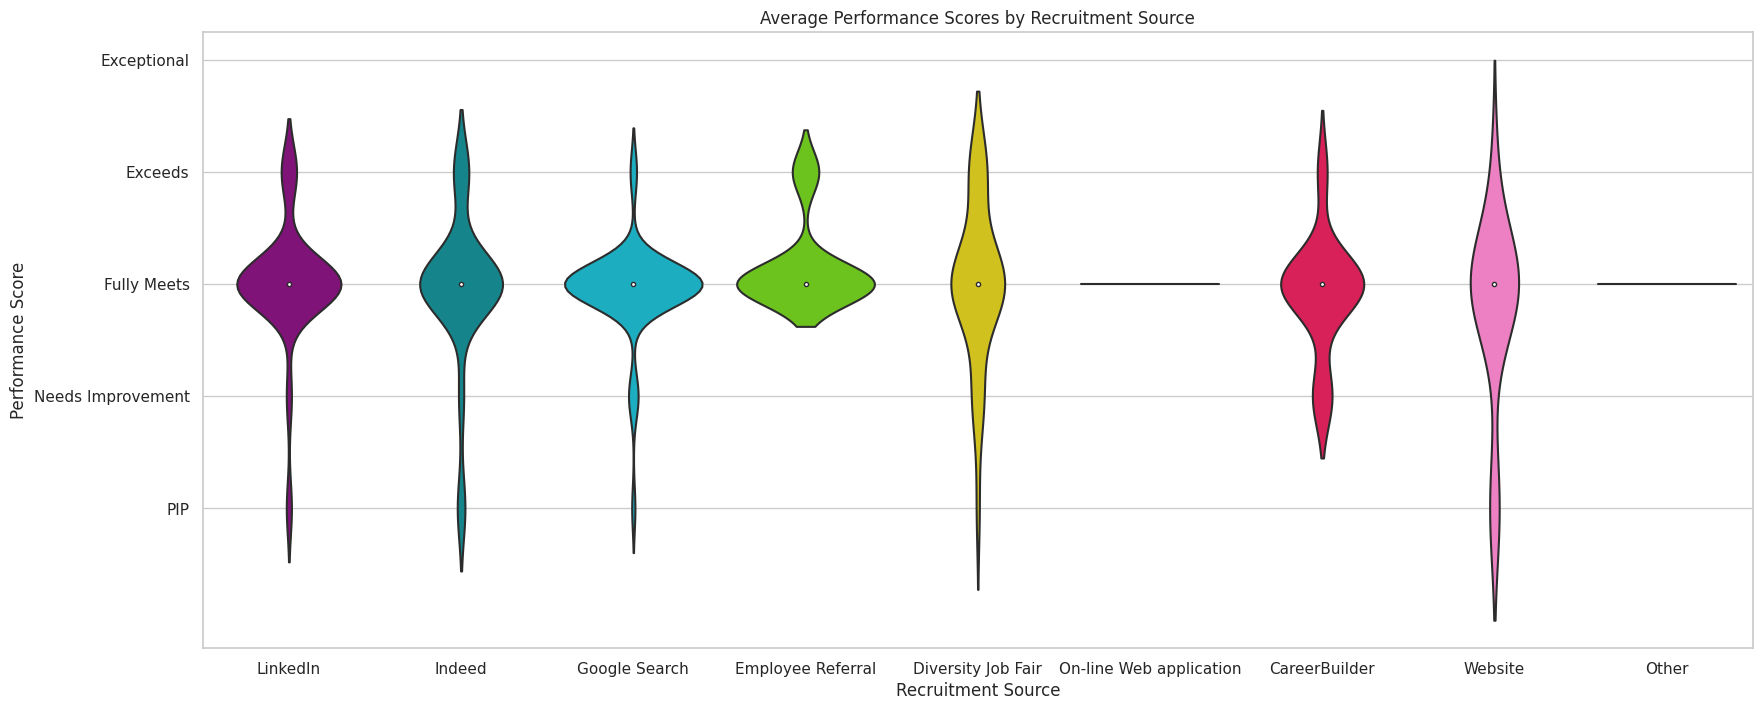

In [ ]:
#performance based on source of employee source
plt.figure(figsize=(20, 8))
sns.violinplot(data=df_cleaned, x='RecruitmentSource', y='PerfScoreID', palette=colors)
plt.title('Average Performance Scores by Recruitment Source')
plt.xlabel('Recruitment Source')
plt.ylabel('Performance Score')
plt.yticks([1, 2, 3, 4, 5], ['PIP', 'Needs Improvement', 'Fully Meets', 'Exceeds', 'Exceptional'])
plt.show()

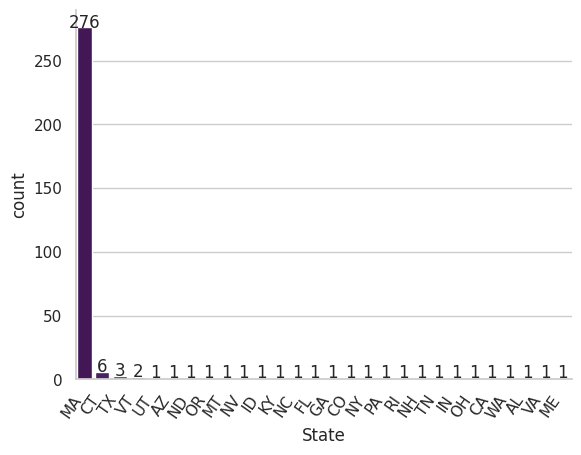

In [ ]:
df_cleaned = df.dropna(subset=['State'])
ax = sns.countplot(data=df_cleaned, x='State', palette='viridis', order=df_cleaned['State'].value_counts().index)

sns.set_theme(style='whitegrid')
sns.despine()

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='baseline')


plt.xticks(rotation=55, ha='right')

plt.show()


In [ ]:
df_cleaned = df.dropna(subset=['State'])
df_cleaned['State'] = df_cleaned['State'].str.strip()

# Calculate the total number of employees
total_employees = len(df_cleaned)

# Calculate the number of rows with 'MA' and 'CT' states
num_ma_rows = len(df_cleaned[df_cleaned['State'] == 'MA'])
num_ct_rows = len(df_cleaned[df_cleaned['State'] == 'CT'])

# Calculate the percentages
percentage_ma = (num_ma_rows / total_employees) * 100
percentage_ct = (num_ct_rows / total_employees) * 100

# Print the stats
print(f"Number of rows with 'MA' state: {num_ma_rows} ({percentage_ma:.2f}%)")
print(f"Number of rows with 'CT' state: {num_ct_rows} ({percentage_ct:.2f}%)")

Number of rows with 'MA' state: 276 (88.75%)
Number of rows with 'CT' state: 6 (1.93%)


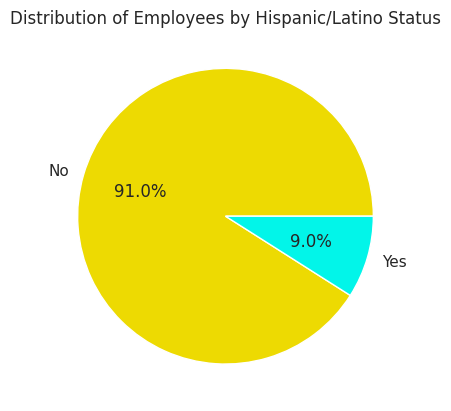

In [12]:
# Cleaning
df_cleaned = df.dropna(subset=['HispanicLatino'])
# .capitalize() to unify Yes & yes and No & no
df_cleaned['HispanicLatino'] = df_cleaned['HispanicLatino'].str.strip().str.capitalize()

# Calculate the counts for each category
category_counts = df_cleaned['HispanicLatino'].value_counts()

# Create a pie chart using Seaborn
sns.set_theme()
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=0, colors=['#edda02','#02f5e9'])
plt.title('Distribution of Employees by Hispanic/Latino Status')
plt.show()

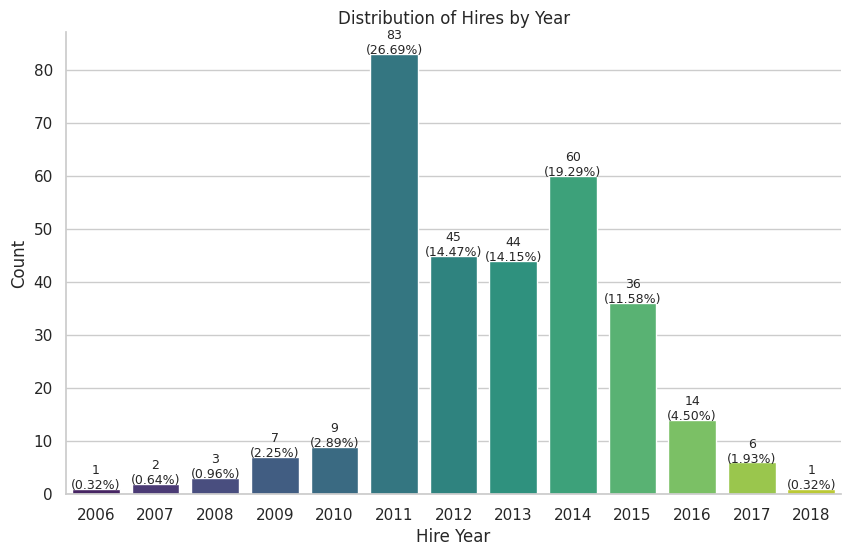

In [ ]:
# Make sure 'DateofHire' is datetime
df['DateofHire'] = pd.to_datetime(df['DateofHire'])

# Extract the year from 'DateofHire'
df['HireYear'] = df['DateofHire'].dt.year

# Calculate counts and percentages for each year
yearly_counts = df['HireYear'].value_counts().sort_index()
yearly_percentages = (yearly_counts / len(df)) * 100

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=yearly_counts.index, y=yearly_counts, palette='viridis')
sns.set_theme(style='whitegrid')
sns.despine()

# Annotate with counts and percentages
for p, percentage in zip(ax.patches, yearly_percentages):
    ax.annotate(f'{int(p.get_height())}\n({percentage:.2f}%)',
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='baseline', fontsize=9)

plt.title('Distribution of Hires by Year')
plt.xlabel('Hire Year')
plt.ylabel('Count')
plt.show()

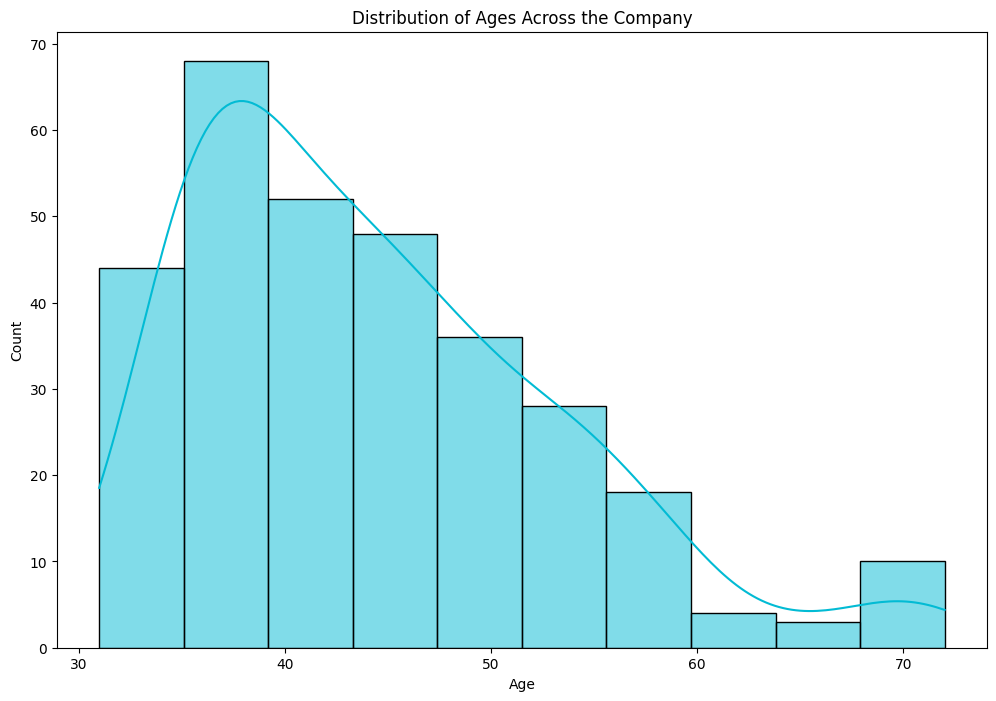

In [ ]:
from datetime import datetime

df_cleaned['DOB'] = pd.to_datetime(df_cleaned['DOB'])  # make sure it's converted to datetime

# Calculate age from DOB
df_cleaned['Age'] = (datetime.now() - df_cleaned['DOB']).astype('<m8[Y]')

# Create a distribution plot for the ages
plt.figure(figsize=(12, 8))
sns.histplot(data=df_cleaned, x='Age', bins=10, kde=True, color='#02bbd4')
plt.title('Distribution of Ages Across the Company')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

<ipython-input-26-784d9280e14b>:5: UserWarning: The palette list has more values (5) than needed (4), which may not be intended.
  sns.scatterplot(data=df_cleaned, x='EngagementSurvey', y='PerfScoreID', hue='PerfScoreID', palette=['#910188', '#02969e', '#e39d07', '#6cde02','#e39d07'], alpha=0.7)


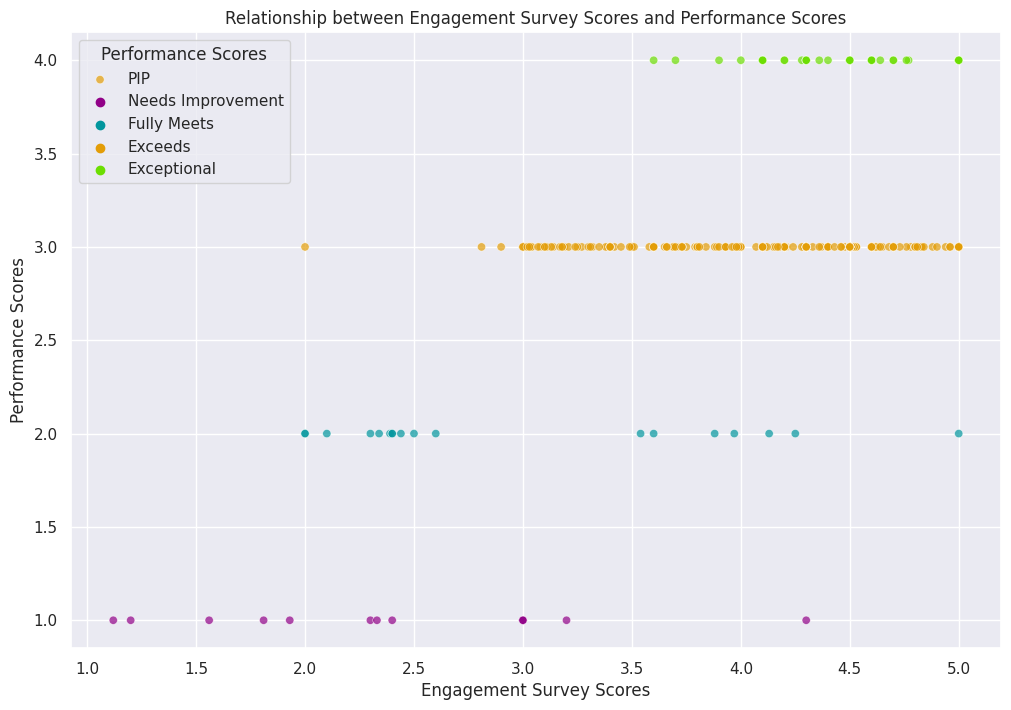

In [26]:
df_cleaned = df.dropna(subset=['EngagementSurvey', 'PerfScoreID'])

# Create a scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cleaned, x='EngagementSurvey', y='PerfScoreID', hue='PerfScoreID', palette=['#910188', '#02969e', '#e39d07', '#6cde02','#e39d07'], alpha=0.7)
plt.title('Relationship between Engagement Survey Scores and Performance Scores')
plt.xlabel('Engagement Survey Scores')
plt.ylabel('Performance Scores')
plt.legend(title='Performance Scores', loc='upper left', labels=['PIP', 'Needs Improvement', 'Fully Meets', 'Exceeds', 'Exceptional'])
plt.show()


<ipython-input-356-61b56de3caaa>:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df_cleaned, x='LastPerformanceReview_Date', y='Absences', estimator='mean', ci=None, color='#02969e')


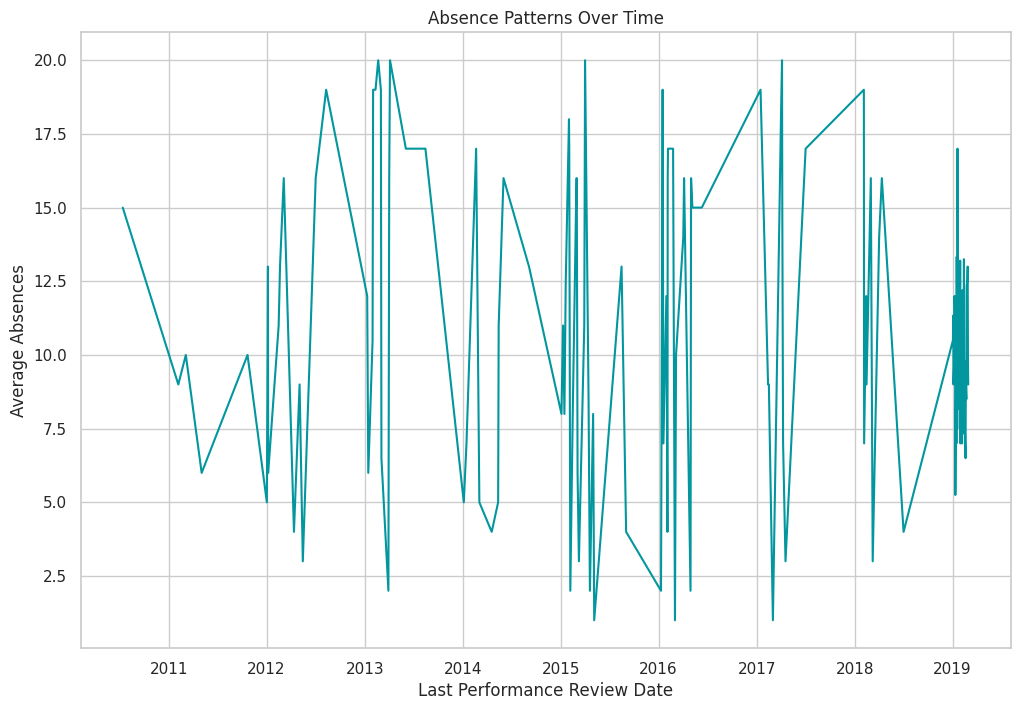

In [ ]:
df_cleaned = df.dropna(subset=['Absences', 'EmpSatisfaction', 'LastPerformanceReview_Date'])

# Convert 'LastPerformanceReview_Date' to datetime format
df_cleaned['LastPerformanceReview_Date'] = pd.to_datetime(df_cleaned['LastPerformanceReview_Date'], errors='coerce')

# Create a line plot or bar chart to visualize the trend of absences over time
plt.figure(figsize=(12, 8))
sns.lineplot(data=df_cleaned, x='LastPerformanceReview_Date', y='Absences', estimator='mean', ci=None, color='#02969e')
plt.title('Absence Patterns Over Time')
plt.xlabel('Last Performance Review Date')
plt.ylabel('Average Absences')
plt.show()

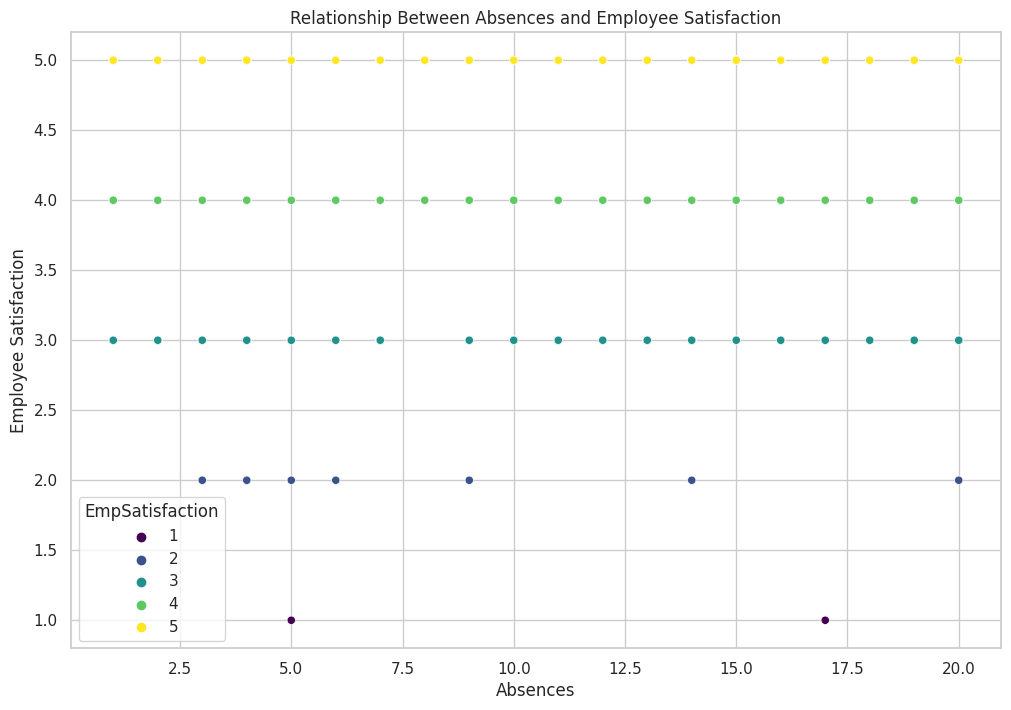

In [ ]:
# Explore the relationship between absences and employee satisfaction
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cleaned, x='Absences', y='EmpSatisfaction', hue='EmpSatisfaction', palette='viridis')
plt.title('Relationship Between Absences and Employee Satisfaction')
plt.xlabel('Absences')
plt.ylabel('Employee Satisfaction')
plt.show()

<ipython-input-28-201ab2ca4832>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['DateofHire'] = pd.to_datetime(filtered_df['DateofHire'])
<ipython-input-28-201ab2ca4832>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['LastPerformanceReview_Date'] = pd.to_datetime(filtered_df['LastPerformanceReview_Date'])
<ipython-input-28-201ab2ca4832>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

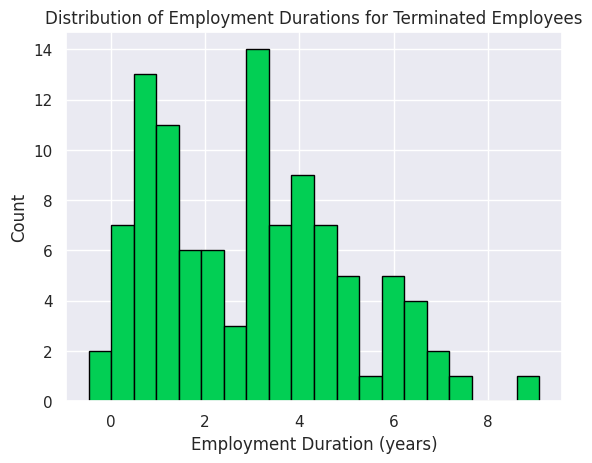

In [28]:
# Filter the DataFrame for the specified employment statuses
filtered_df = df_cleaned[df_cleaned['EmploymentStatus'].isin(['Voluntarily Terminated', 'Terminated for Cause'])]

# Make sure columns are convertd to datetime
filtered_df['DateofHire'] = pd.to_datetime(filtered_df['DateofHire'])
filtered_df['LastPerformanceReview_Date'] = pd.to_datetime(filtered_df['LastPerformanceReview_Date'])

# Calculate the duration between DateofHire and LastPerformanceReview_Date in years
filtered_df['EmploymentDuration'] = (filtered_df['LastPerformanceReview_Date'] - filtered_df['DateofHire']).dt.days / 365

# Plot a histogram for the distribution of employment durations
plt.hist(filtered_df['EmploymentDuration'], bins=20, color='#02cf54', edgecolor='black')
plt.title('Distribution of Employment Durations for Terminated Employees')
plt.xlabel('Employment Duration (years)')
plt.ylabel('Count')
plt.show()

In [33]:
average_duration = ((filtered_df['LastPerformanceReview_Date'] - filtered_df['DateofHire']).dt.days / 365).mean()
print(f'Average Terminated Employee Duration: {average_duration:.2f} years.')


Average Terminated Employee Duration: 2.95 years.


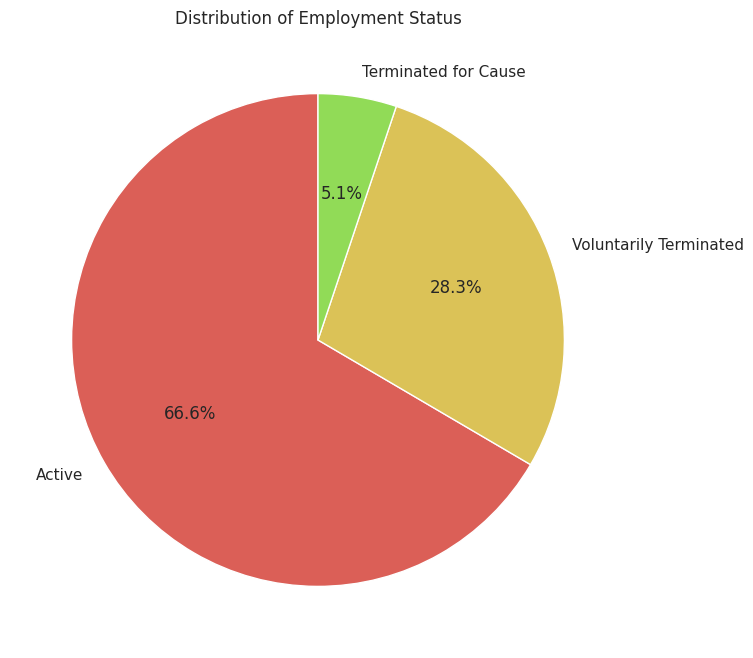

In [ ]:
# Count the occurrences of each employment status
employment_status_counts = df_cleaned['EmploymentStatus'].value_counts()

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(employment_status_counts, labels=employment_status_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette("hls", 8))
plt.title('Distribution of Employment Status')
plt.show()

<Figure size 800x800 with 0 Axes>

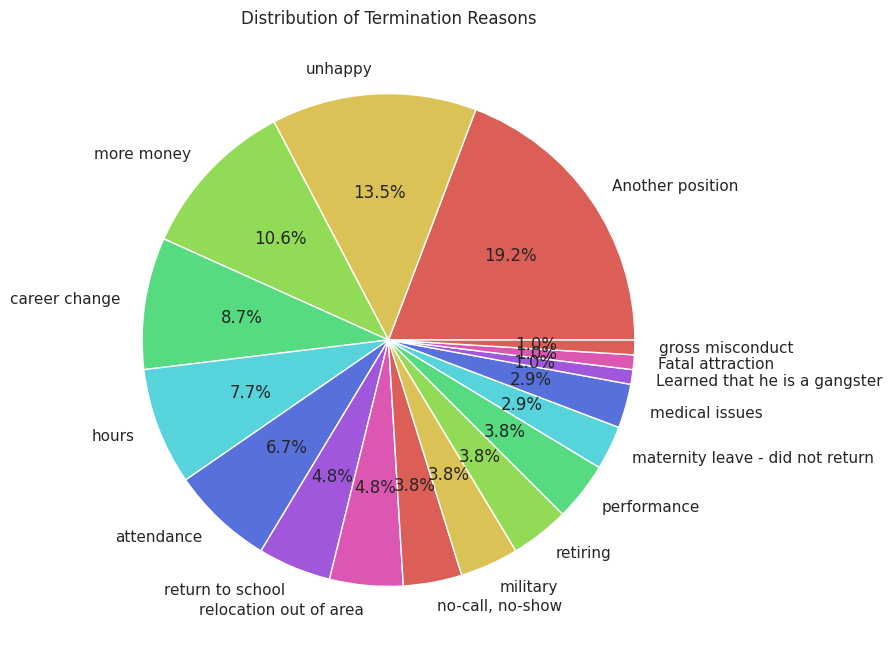

In [ ]:
plt.figure(figsize=(8, 8))
sns.set_palette("pastel")

# Count the occurrences of each TermReason
df_filtered = df_cleaned[df_cleaned['TermReason'] != 'N/A-StillEmployed']

# Count the occurrences of each termination reason
termination_reason_counts = df_filtered['TermReason'].value_counts()

# Plot a pie chart
plt.figure(figsize=(12, 8))
plt.pie(termination_reason_counts, labels=termination_reason_counts.index, autopct='%1.1f%%', startangle=0, colors=sns.color_palette("hls", 8))
plt.title('Distribution of Termination Reasons')
plt.show()